In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from scaper_waspaa2017.urban_sed import eval as C
from scaper_waspaa2017.urban_sed_crnn import eval as CR

## Main results table

In [6]:
# ready
results001 = C.evaluate('exp001', load_predictions=True)

F1s: 0.5688, P1s: 0.6911, R1s: 0.4833, F100ms: 0.5688, P100ms: 0.6911, R100ms: 0.4833 | E1s: 0.5770, E100ms: 0.5770


In [3]:
# not ready
results002 = CR.evaluate('exp002', load_predictions=True)

F1s: 0.4946, P1s: 0.4354, R1s: 0.5724, F100ms: 0.4797, P100ms: 0.4378, R100ms: 0.5304 | E1s: 0.9019, E100ms: 0.8729


In [9]:
# exp004 = exp002 continued
results004 = CR.evaluate('exp004', load_predictions=True)

F1s: 0.5678, P1s: 0.5331, R1s: 0.6072, F100ms: 0.5459, P100ms: 0.5284, R100ms: 0.5646 | E1s: 0.6605, E100ms: 0.6606


In [5]:
# ready
results003 = C.evaluate('exp003', load_predictions=True)

F1s: 0.5778, P1s: 0.6720, R1s: 0.5069, F100ms: 0.5778, P100ms: 0.6720, R100ms: 0.5069 | E1s: 0.5595, E100ms: 0.5595


### Create DF

In [4]:
# Label list
label_list = (['air_conditioner', 'car_horn', 'children_playing',
                   'dog_bark', 'drilling', 'engine_idling', 'gun_shot',
                   'jackhammer', 'siren', 'street_music'])
label_list = sorted(label_list)

In [20]:
df_f1s = pd.DataFrame(columns=['class', 'CRNN', 'CNN', 'CNN3M'])

In [21]:
for label in label_list:
    f1_001_c = results001['results1s']['class_wise'][label]['f_measure']['f_measure']
    f1_002_c = results002['results1s']['class_wise'][label]['f_measure']['f_measure']
    f1_003_c = results003['results1s']['class_wise'][label]['f_measure']['f_measure']
    f1_004_c = results004['results1s']['class_wise'][label]['f_measure']['f_measure']
    df_f1s.loc[len(df_f1s)] = [label, f1_004_c, f1_001_c, f1_003_c]

In [22]:
# lastly append global result
f1_001 = results001['results1s']['overall']['f_measure']['f_measure']
f1_002 = results002['results1s']['overall']['f_measure']['f_measure']
f1_003 = results003['results1s']['overall']['f_measure']['f_measure']
f1_004 = results004['results1s']['overall']['f_measure']['f_measure']
df_f1s.loc[len(df_f1s)] = ['OVERALL', f1_004, f1_001, f1_003]

In [23]:
df_f1s

,class,CRNN,CNN,CNN3M
0,air_conditioner,0.459969,0.338706,0.377788
1,car_horn,0.520434,0.688195,0.694346
2,children_playing,0.551764,0.491810,0.535093
3,dog_bark,0.505374,0.517531,0.519545
4,drilling,0.575130,0.579227,0.571429
5,engine_idling,0.570142,0.510339,0.543264
6,gun_shot,0.671921,0.503468,0.523588
7,jackhammer,0.579179,0.750044,0.760129
8,siren,0.644197,0.636855,0.639573
9,street_music,0.539117,0.591611,0.574442


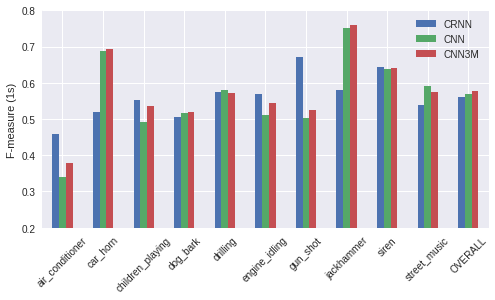

In [24]:
ax = df_f1s.plot(kind='bar', rot=45, figsize=(8,4))
ax.set_xticklabels(df_f1s['class'])
plt.ylabel('F-measure (1s)')
plt.ylim([0.2, 0.8])
plt.show()

In [25]:
df_f1s_two = pd.DataFrame(columns=['class', 'CRNN', 'CNN'])
for label in label_list:
    f1_001_c = results001['results1s']['class_wise'][label]['f_measure']['f_measure']
    f1_004_c = results004['results1s']['class_wise'][label]['f_measure']['f_measure']
    df_f1s_two.loc[len(df_f1s_two)] = [label, f1_004_c, f1_001_c]
# lastly append global result
f1_001 = results001['results1s']['overall']['f_measure']['f_measure']
f1_004 = results004['results1s']['overall']['f_measure']['f_measure']
df_f1s_two.loc[len(df_f1s_two)] = ['OVERALL', f1_004, f1_001]

In [26]:
df_f1s_two

,class,CRNN,CNN
0,air_conditioner,0.459969,0.338706
1,car_horn,0.520434,0.688195
2,children_playing,0.551764,0.491810
3,dog_bark,0.505374,0.517531
4,drilling,0.575130,0.579227
5,engine_idling,0.570142,0.510339
6,gun_shot,0.671921,0.503468
7,jackhammer,0.579179,0.750044
8,siren,0.644197,0.636855
9,street_music,0.539117,0.591611


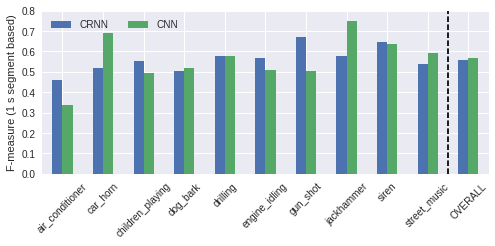

In [27]:
ax = df_f1s_two.plot(kind='bar', rot=45, figsize=(8,3))
ax.set_xticklabels(df_f1s_two['class'])
plt.ylabel('F-measure (1 s segment based)')
plt.ylim([0.0, 0.8])
plt.legend(loc=2, ncol=2)
plt.vlines(9.5, 0, 1, linestyles='dashed')
plt.show()

In [28]:
fig = ax.get_figure()
plotfile = './plots/f1s_cnn_vs_crnn_overall_squeezed.pdf'
fig.savefig(plotfile, bbox_inches='tight')

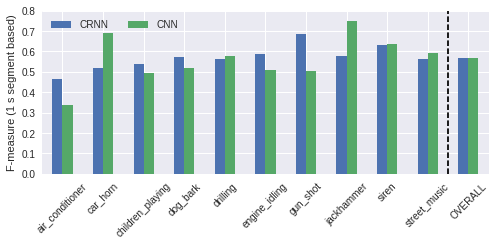

In [7]:
# 4-27
df_f1s_two = pd.DataFrame(columns=['class', 'CRNN', 'CNN'])
for label in label_list:
    f1_001_c = results001['results1s']['class_wise'][label]['f_measure']['f_measure']
    f1_004_c = results004['results1s']['class_wise'][label]['f_measure']['f_measure']
    df_f1s_two.loc[len(df_f1s_two)] = [label, f1_004_c, f1_001_c]
# lastly append global result
f1_001 = results001['results1s']['overall']['f_measure']['f_measure']
f1_004 = results004['results1s']['overall']['f_measure']['f_measure']
df_f1s_two.loc[len(df_f1s_two)] = ['OVERALL', f1_004, f1_001]

ax = df_f1s_two.plot(kind='bar', rot=45, figsize=(8,3))
ax.set_xticklabels(df_f1s_two['class'])
plt.ylabel('F-measure (1 s segment based)')
plt.ylim([0.0, 0.8])
plt.legend(loc=2, ncol=2)
plt.vlines(9.5, 0, 1, linestyles='dashed')
plt.show()

In [8]:
fig = ax.get_figure()
plotfile = './plots/f1s_cnn_vs_crnn_overall_squeezed_latest.pdf'
fig.savefig(plotfile, bbox_inches='tight')

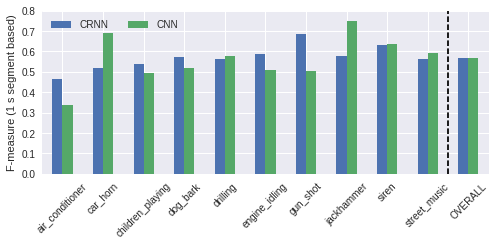

In [11]:
# 4-27
df_f1s_two = pd.DataFrame(columns=['class', 'CRNN', 'CNN'])
for label in label_list:
    f1_001_c = results001['results1s']['class_wise'][label]['f_measure']['f_measure']
    f1_004_c = results004['results1s']['class_wise'][label]['f_measure']['f_measure']
    df_f1s_two.loc[len(df_f1s_two)] = [label, f1_004_c, f1_001_c]
# lastly append global result
f1_001 = results001['results1s']['overall']['f_measure']['f_measure']
f1_004 = results004['results1s']['overall']['f_measure']['f_measure']
df_f1s_two.loc[len(df_f1s_two)] = ['OVERALL', f1_004, f1_001]

ax = df_f1s_two.plot(kind='bar', rot=45, figsize=(8,3))
ax.set_xticklabels(df_f1s_two['class'])
plt.ylabel('F-measure (1 s segment based)')
plt.ylim([0.0, 0.8])
plt.legend(loc=2, ncol=2)
plt.vlines(9.5, 0, 1, linestyles='dashed')
plt.show()

In [12]:
fig = ax.get_figure()
plotfile = './plots/f1s_cnn_vs_crnn_overall_squeezed_latest.pdf'
fig.savefig(plotfile, bbox_inches='tight')